In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [37]:
df = sns.load_dataset("exercise")

In [3]:
df.head()

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


In [4]:
df["diet"].value_counts()

diet
no fat     45
low fat    45
Name: count, dtype: int64

In [5]:
df["kind"].value_counts()

kind
rest       30
walking    30
running    30
Name: count, dtype: int64

In [6]:
df["time"].value_counts()

time
1 min     30
15 min    30
30 min    30
Name: count, dtype: int64

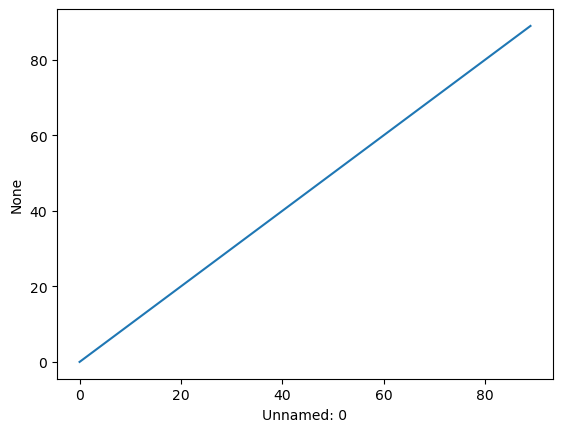

In [7]:
sns.lineplot(x = df["Unnamed: 0"], y = df.index)
plt.show()

In [63]:
df["id"].value_counts()

id
1     3
2     3
29    3
28    3
27    3
26    3
25    3
24    3
23    3
22    3
21    3
20    3
19    3
18    3
17    3
16    3
15    3
14    3
13    3
12    3
11    3
10    3
9     3
8     3
7     3
6     3
5     3
4     3
3     3
30    3
Name: count, dtype: int64

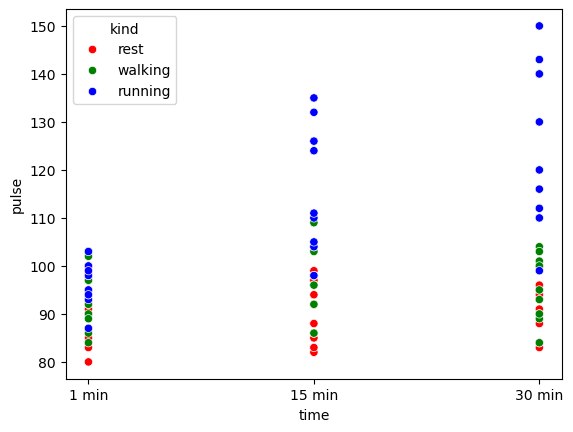

In [75]:
sns.scatterplot(x = df["time"], y = df["pulse"],hue = df["kind"],  palette = ["red", "green", "blue"])
plt.show()

In [87]:
df2 = pd.get_dummies(df, dtype = int)

In [97]:
df2.columns

Index(['Unnamed: 0', 'id', 'pulse', 'diet_no fat', 'diet_low fat',
       'time_1 min', 'time_15 min', 'time_30 min', 'kind_rest', 'kind_walking',
       'kind_running'],
      dtype='object')

In [103]:
df2[["kind_running","pulse"]].corr()

,kind_running,pulse
kind_running,1.000000,0.639676
pulse,0.639676,1.000000


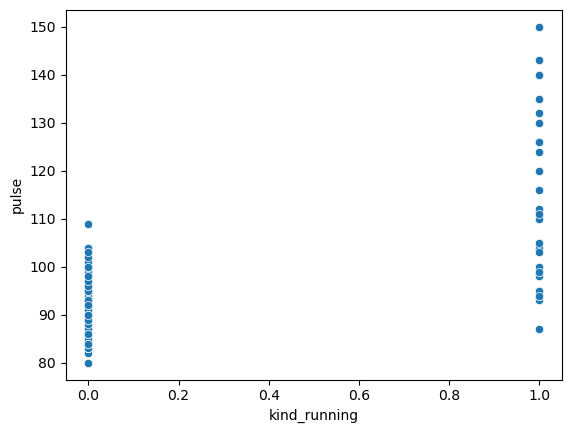

In [107]:
sns.scatterplot(x = df2["kind_running"], y= df2["pulse"])
plt.show()

In [113]:
from sklearn.linear_model import LogisticRegression

In [115]:
logreg = LogisticRegression()

In [129]:
from sklearn.model_selection import train_test_split

In [145]:
X = df2["pulse"].values
X = X.reshape(-1,1)
y = df2["kind_running"].values

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [149]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [155]:
y_pred = logreg.predict(X_test)

In [153]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 'sag', '

In [159]:
from sklearn.metrics import confusion_matrix

In [161]:
help(confusion_matrix)

Help on function confusion_matrix in module sklearn.metrics._classification:

confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
    Compute confusion matrix to evaluate the accuracy of a classification.

    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` and
    predicted to be in group :math:`j`.

    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.

    Read more in the :ref:`User Guide <confusion_matrix>`.

    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.

    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.

    labels : array-like of shape (n_classes), default=None
        List of lab

In [163]:
confusion_matrix(y_test, y_pred)

array([[16,  2],
       [ 2,  7]], dtype=int64)

In [167]:
from sklearn.metrics import classification_report

In [171]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.78      0.78      0.78         9

    accuracy                           0.85        27
   macro avg       0.83      0.83      0.83        27
weighted avg       0.85      0.85      0.85        27



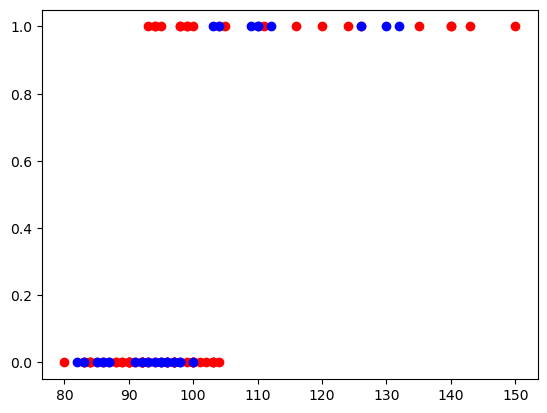

In [189]:
plt.scatter(X_train, y_train, color = "red")
plt.scatter(X_test, y_pred, color = "blue")
plt.show()